In [6]:
# import image module
from IPython.display import Image

# get the image
Image(url="Imagen.png", width=1300, height=800)
    

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = data= pd.read_csv('dailyActivity.csv')
df.head(1)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985


In [4]:
df.drop(['Id','TrackerDistance','TrackerDistance'], axis=1, inplace=True)

In [5]:
df.dtypes

ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [6]:
#Rename Column 'ActivityDate' to 'Datw'
df.rename(columns = {'ActivityDate':'Date'}, inplace = True)


In [7]:
#Convert 'Date' into a datetime type
df['Date']= pd.to_datetime(df['Date'])

#Add a column with the names of the week days
df['number_of_week'] = df['Date'].dt.dayofweek
df['day_of_week'] = df.Date.dt.day_name()

In [8]:
# check the number of null elements in the dataframe
data.isnull().sum()

Date                        0
TotalSteps                  0
TotalDistance               0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
number_of_week              0
day_of_week                 0
dtype: int64

In [9]:
 # To check duplicates
 df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
935    False
936    False
937    False
938    False
939    False
Length: 940, dtype: bool

In [10]:
df.describe()

,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,number_of_week
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,2.918085
std,5087.150742,3.924606,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,1.942379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,1.000000
50%,7405.500000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,3.000000
75%,10727.000000,7.712500,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,5.000000
max,36019.000000,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,6.000000


In [11]:
df.head(3)

,Date,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,number_of_week,day_of_week
0,2016-04-12,13162,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,Tuesday
1,2016-04-13,10735,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,Wednesday
2,2016-04-14,10460,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,3,Thursday


In [12]:
#Arrange the data by days of the week
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday  = df.groupby(['day_of_week']).sum().reindex(cats) 
df_weekday

,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,number_of_week
day_of_week,,,,,,,,,,,,,
Monday,933704,666.349999,26.946254,184.480001,70.300000,403.570000,0.31,2773,1680,23047,123353,278905,0
Tuesday,1235001,886.499995,25.696213,245.220001,90.140000,527.599999,0.22,3489,2179,29996,153119,358114,152
Wednesday,1133906,823.249999,20.938194,245.020000,79.060000,488.450001,0.20,3117,1965,28478,148422,345393,300
Thursday,1088658,780.900004,19.004582,204.400001,74.260000,482.620000,0.34,2853,1758,27257,141413,323337,441
Friday,938477,669.049998,9.095440,165.429999,60.960000,439.629998,0.23,2527,1526,25729,126039,293805,504
Saturday,1010969,725.980000,0.000000,187.809998,83.989999,448.530000,0.13,2718,1885,25686,119571,292016,620
Sunday,838921,608.289999,0.000000,180.160000,74.779999,349.970002,0.08,2418,1758,21051,119821,273823,726


In [13]:
week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Sartuday", "Sunday"]

### Total Results

In [14]:
avg_distance = df.groupby(["day_of_week"])["TotalDistance"].mean().rename_axis("").reset_index(name="Distance")
print(avg_distance)

              Distance
0     Friday  5.309921
1     Monday  5.552917
2   Saturday  5.854677
3     Sunday  5.027190
4   Thursday  5.312245
5    Tuesday  5.832237
6  Wednesday  5.488333


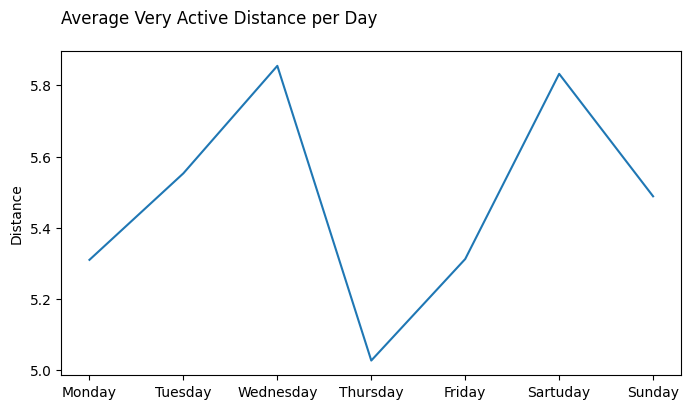

In [15]:
## Visualize the data
plt.figure(figsize=(8, 4.21), dpi=100)
plt.title("Average Very Active Distance per Day", pad=20, loc="left")
sns.lineplot(data=avg_distance, x=week, y="Distance")
plt.show()

### Active Days

In [16]:
avg_very_active = df.groupby(["day_of_week"])["VeryActiveDistance"].mean().rename_axis("").reset_index(name="Distance")
print(avg_very_active)


              Distance
0     Friday  1.312937
1     Monday  1.537333
2   Saturday  1.514597
3     Sunday  1.488926
4   Thursday  1.390476
5    Tuesday  1.613289
6  Wednesday  1.633467


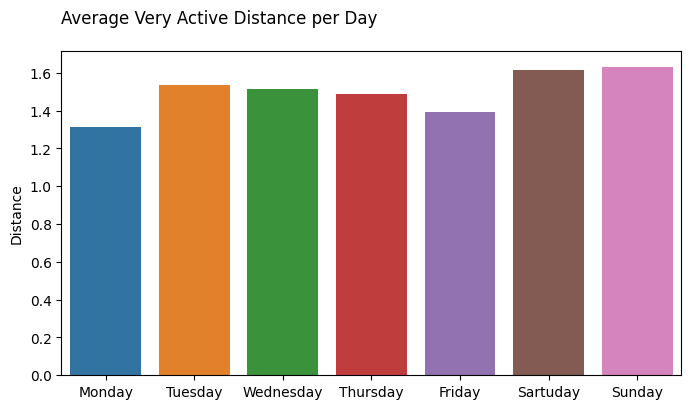

In [17]:
## Visualize the data
plt.figure(figsize=(8, 4.21), dpi=100)
plt.title("Average Very Active Distance per Day", pad=20, loc="left")
sns.barplot(data=avg_very_active, x=week, y="Distance")
plt.show()

### Medium Active Days

              Distance
0     Friday  0.483810
1     Monday  0.585833
2   Saturday  0.677339
3     Sunday  0.618017
4   Thursday  0.505170
5    Tuesday  0.593026
6  Wednesday  0.527067


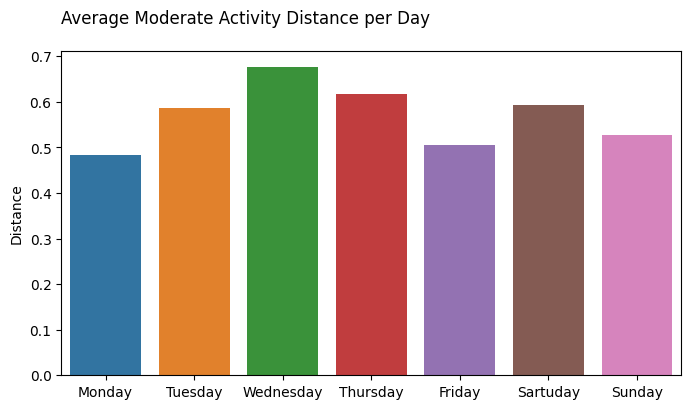

In [18]:
avg_medium_active = df.groupby(["day_of_week"])["ModeratelyActiveDistance"].mean().rename_axis("").reset_index(name="Distance")
print(avg_medium_active)

## Visualize the data
plt.figure(figsize=(8, 4.21), dpi=100)
plt.title("Average Moderate Activity Distance per Day", pad=20, loc="left")
sns.barplot(data=avg_medium_active, x=week, y="Distance")
plt.show()

### Light Active Days

              Distance
0     Friday  3.489127
1     Monday  3.363083
2   Saturday  3.617177
3     Sunday  2.892314
4   Thursday  3.283129
5    Tuesday  3.471053
6  Wednesday  3.256333


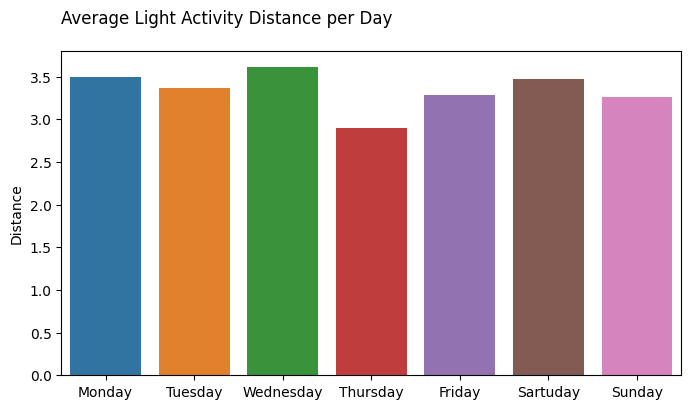

In [19]:
avg_light_active = df.groupby(["day_of_week"])["LightActiveDistance"].mean().rename_axis("").reset_index(name="Distance")
print(avg_light_active)

## Graphs
plt.figure(figsize=(8, 4.21), dpi=100)
plt.title("Average Light Activity Distance per Day", pad=20, loc="left")
sns.barplot(data=avg_light_active, x=week, y="Distance")
plt.show()

In [20]:
avg_all = df.groupby(["day_of_week"])[["LightActiveDistance",'ModeratelyActiveDistance','VeryActiveDistance']].agg('mean')
print(avg_all)
avg_all= pd.DataFrame(avg_all, columns=['LightActiveDistance','ModeratelyActiveDistance','VeryActiveDistance'])
avg_all['week']= avg_all.index
avg_all



             LightActiveDistance  ModeratelyActiveDistance  VeryActiveDistance
day_of_week                                                                   
Friday                  3.489127                  0.483810            1.312937
Monday                  3.363083                  0.585833            1.537333
Saturday                3.617177                  0.677339            1.514597
Sunday                  2.892314                  0.618017            1.488926
Thursday                3.283129                  0.505170            1.390476
Tuesday                 3.471053                  0.593026            1.613289
Wednesday               3.256333                  0.527067            1.633467


,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,week
day_of_week,,,,
Friday,3.489127,0.483810,1.312937,Friday
Monday,3.363083,0.585833,1.537333,Monday
Saturday,3.617177,0.677339,1.514597,Saturday
Sunday,2.892314,0.618017,1.488926,Sunday
Thursday,3.283129,0.505170,1.390476,Thursday
Tuesday,3.471053,0.593026,1.613289,Tuesday
Wednesday,3.256333,0.527067,1.633467,Wednesday


<AxesSubplot: xlabel='week'>

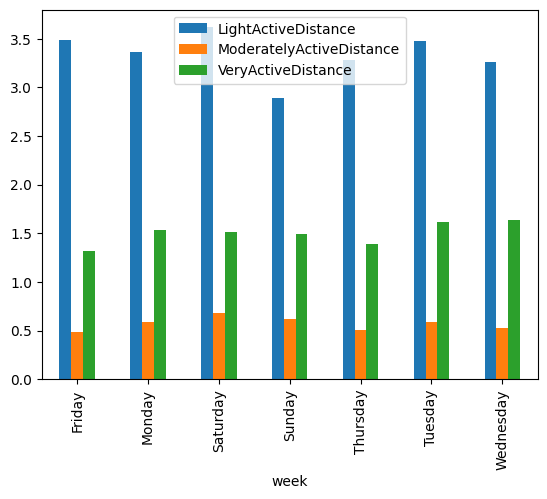

In [21]:
avg_all.plot(x="week", y=['LightActiveDistance', 'ModeratelyActiveDistance',	'VeryActiveDistance'], kind="bar")

In [22]:


avg_all = df.groupby(["day_of_week"])[["LightActiveDistance",'ModeratelyActiveDistance','VeryActiveDistance']].agg('mean')
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

avg_all['Day_id'] = avg_all.index
avg_all['Day_id'] = avg_all['Day_id'].map(sorterIndex)
avg_all.head()



,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,Day_id
day_of_week,,,,
Friday,3.489127,0.483810,1.312937,5
Monday,3.363083,0.585833,1.537333,1
Saturday,3.617177,0.677339,1.514597,6
Sunday,2.892314,0.618017,1.488926,0
Thursday,3.283129,0.505170,1.390476,4


In [23]:
avg_all.sort_values('Day_id', inplace=True)
avg_all['week']= avg_all.index
avg_all.head()


,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,Day_id,week
day_of_week,,,,,
Sunday,2.892314,0.618017,1.488926,0,Sunday
Monday,3.363083,0.585833,1.537333,1,Monday
Tuesday,3.471053,0.593026,1.613289,2,Tuesday
Wednesday,3.256333,0.527067,1.633467,3,Wednesday
Thursday,3.283129,0.505170,1.390476,4,Thursday


Text(0.5, 0, 'Days')

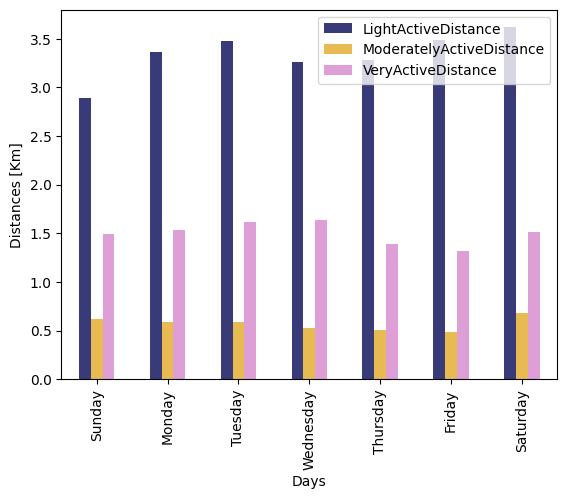

In [24]:
avg_all.plot(x="week", y=['LightActiveDistance', 'ModeratelyActiveDistance',	'VeryActiveDistance'], kind="bar", colormap='tab20b')
plt.ylabel('Distances [Km]')
plt.xlabel('Days')

### Calories Burned

In [25]:
cal = df.groupby(["day_of_week"])["Calories"].mean()
print(cal)

calories= pd.DataFrame(cal, columns=['Calories'])
calories['week']= cal.index
calories
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

calories['Day_id'] = calories.index
calories['Day_id'] = calories['Day_id'].map(sorterIndex)
calories.head()
calories.sort_values('Day_id', inplace=True)
calories['week']= avg_all.index
calories.head()



day_of_week
Friday       2331.785714
Monday       2324.208333
Saturday     2354.967742
Sunday       2263.000000
Thursday     2199.571429
Tuesday      2356.013158
Wednesday    2302.620000
Name: Calories, dtype: float64


,Calories,week,Day_id
day_of_week,,,
Sunday,2263.000000,Sunday,0
Monday,2324.208333,Monday,1
Tuesday,2356.013158,Tuesday,2
Wednesday,2302.620000,Wednesday,3
Thursday,2199.571429,Thursday,4


<AxesSubplot: xlabel='week', ylabel='Calories'>

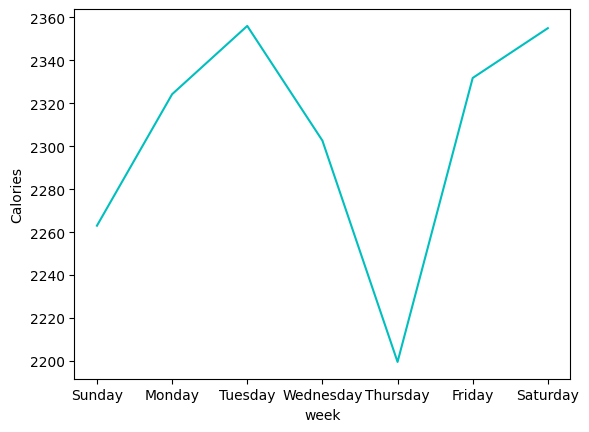

In [26]:

sns.lineplot(data=calories, x= 'week', y='Calories', color='c')

Correlation "Total Distance - Total Calories Intake" is: 0.6449618736830637


/tmp/ipykernel_258414/63793622.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x="TotalDistance", y="Calories", palette='husl')


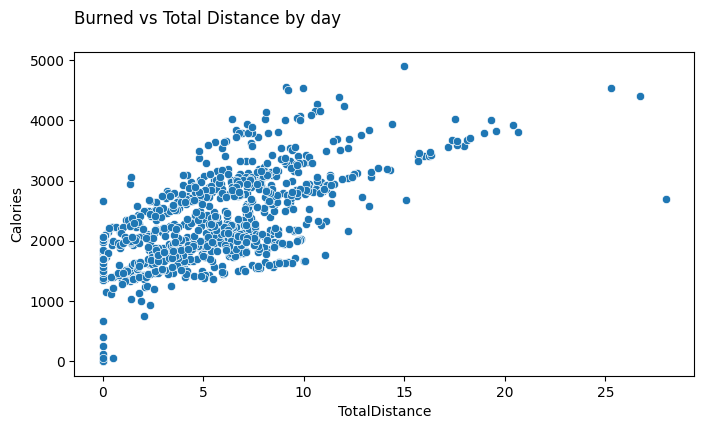

In [27]:
calories_distance_corr = df["TotalDistance"].corr(df["Calories"])
print('Correlation "Total Distance - Total Calories Intake" is:', calories_distance_corr)

## Plot data in a scatterplot
plt.figure(figsize=(8, 4.21), dpi=100)
plt.title("Burned vs Total Distance by day", pad=20, loc="left")
sns.scatterplot(data=df, x="TotalDistance", y="Calories", palette='husl')
plt.show()

In [42]:
calories_distance_corr = df["TotalDistance"].corr(df["Calories"])
print('Correlation "Total Distance - Total Calories" is:', calories_distance_corr)


Correlation "Total Distance - Total Calories" is: 0.6449618736830637


<AxesSubplot: xlabel='TotalDistance', ylabel='Calories'>

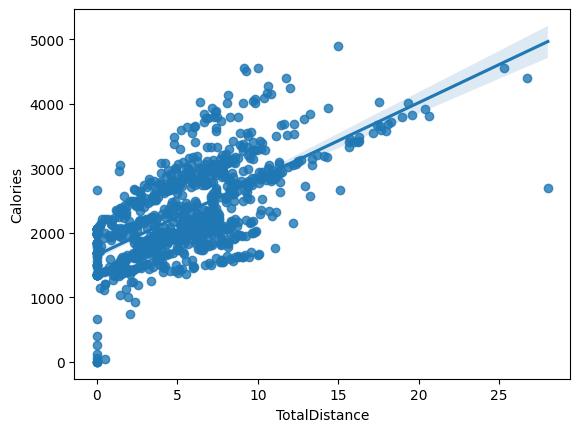

In [41]:
sns.regplot(data=df, x="TotalDistance", y="Calories")

## Sleeping Data

In [43]:
df_sleep= pd.read_csv('sleepDay.csv')
df_sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [31]:
#Drop Id Column
df_sleep.drop('Id', axis=1, inplace=True)

In [32]:
#Convert SleepDay into a Datetime object and rename the column
df_sleep.rename(columns={'SleepDay': 'Date'}, inplace=True)
df_sleep['Date']= pd.to_datetime(df_sleep['Date'])

#Add a column with the names of the week days
df_sleep['number_of_week'] = df_sleep['Date'].dt.dayofweek
df_sleep['day_of_week'] = df_sleep.Date.dt.day_name()

In [33]:
sleep= df_sleep.groupby(["day_of_week"])["TotalMinutesAsleep"].mean()
print(sleep)

sleep= pd.DataFrame(sleep, columns=['TotalMinutesAsleep'])
sleep['week']= cal.index
sleep
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

sleep['Day_id'] = sleep.index
sleep['Day_id'] = sleep['Day_id'].map(sorterIndex)
sleep.head()
sleep.sort_values('Day_id', inplace=True)
sleep['week']= avg_all.index
sleep.head()



day_of_week
Friday       405.421053
Monday       418.829787
Saturday     420.810345
Sunday       452.745455
Thursday     402.369231
Tuesday      404.538462
Wednesday    434.681818
Name: TotalMinutesAsleep, dtype: float64


,TotalMinutesAsleep,week,Day_id
day_of_week,,,
Sunday,452.745455,Sunday,0
Monday,418.829787,Monday,1
Tuesday,404.538462,Tuesday,2
Wednesday,434.681818,Wednesday,3
Thursday,402.369231,Thursday,4


(0.0, 500.0)

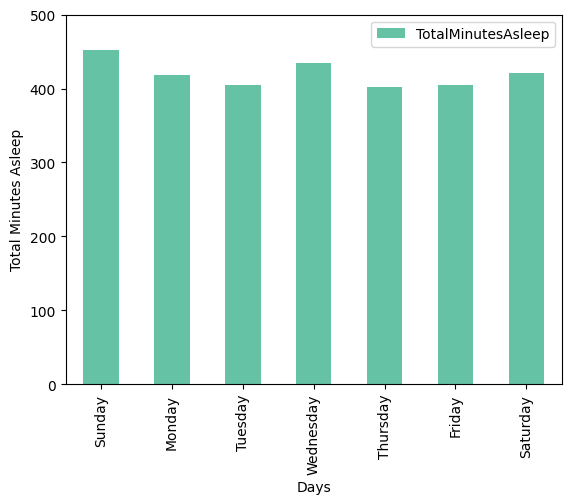

In [34]:
#Visualize data
sleep.plot(x="week", y='TotalMinutesAsleep', kind="bar", colormap='Set2')
plt.ylabel('Total Minutes Asleep')
plt.xlabel('Days')
plt.ylim(0,500)


In [35]:
sleep_distance_corr = df_sleep["TotalMinutesAsleep"].corr(df["TotalDistance"])
print('Correlation "Total Distance - Total minutes Asleep" is:', sleep_distance_corr)

Correlation "Total Distance - Total minutes Asleep" is: -0.08220616396706534


In [36]:
sleep_distance_corr = df_sleep["TotalMinutesAsleep"].corr(df["VeryActiveMinutes"])
print('Correlation "Total Very Active Minutes  - Total minutes Asleep" is:', sleep_distance_corr)

Correlation "Total Very Active Minutes  - Total minutes Asleep" is: -0.0571101427387903


In [46]:
df_sleep['TotalDistance']=df['TotalDistance']


<AxesSubplot: xlabel='TotalMinutesAsleep', ylabel='TotalDistance'>

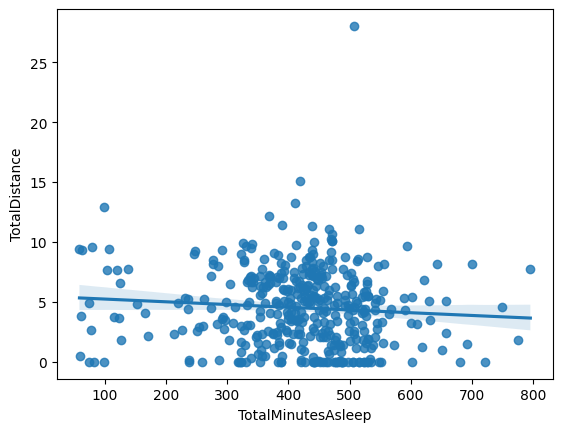

In [47]:
sns.regplot(data= df_sleep, x='TotalMinutesAsleep', y='TotalDistance')

In [37]:
df_MET=pd.read_csv('minuteMETsNarrow.csv')

df_MET.head(3)

,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10


In [38]:
#Rename ActivityMinute Column by Date
df_MET.rename(columns={'ActivityMinute':'Date'},inplace=True)

#Convert 'Date' into a datetime type
df_MET['Date']= pd.to_datetime(df_MET['Date'])

#Add a column with the names of the week days
df_MET['number_of_week'] = df_MET['Date'].dt.dayofweek


In [39]:
df_MET.drop('Id',axis=1,inplace=True)

In [48]:
df_sleep['METs']=df_MET['METs']

In [50]:
METs_sleep_corr = df_sleep['METs'].corr(df_sleep["TotalMinutesAsleep"])
print('Correlation "METs - Total Minutes Asleep" is:', METs_sleep_corr)

Correlation "METs - Total Minutes Asleep" is: 0.09771895308181767


<AxesSubplot: xlabel='TotalMinutesAsleep', ylabel='METs'>

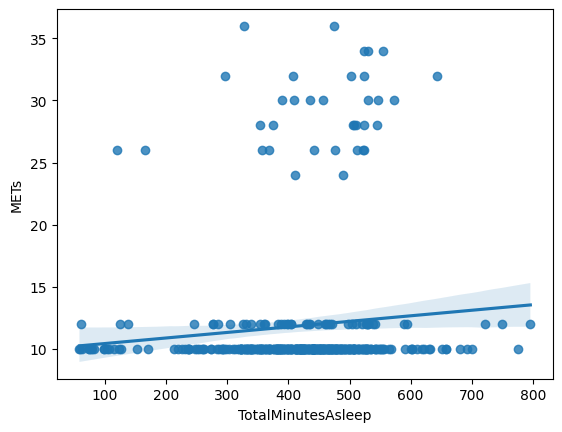

In [49]:
sns.regplot(data= df_sleep, x='TotalMinutesAsleep', y='METs')